### Task 1: Validate Data with a Custom Expectation in Great Expectations
**Description**: Create a custom expectation and validate data with Great Expectations.

**Load a sample DataFrame**

data = {
'age': [25, 30, 35, 40, 45],
'income': [50000, 60000, 75000, None, 100000]
}

In [6]:
# Write your code from here

In [7]:
import pandas as pd
import great_expectations as ge

# Convert the data dictionary to a GE DataFrame
df = ge.from_pandas(pd.DataFrame(data))

# Create custom expectation for income validation
def expect_income_above_minimum(self):
    min_income = 30000
    # Exclude None values
    actual_values = self['income'].dropna()
    success = (actual_values >= min_income).all()
    
    return {
        "success": success,
        "result": {
            "observed_value": actual_values.min(),
            "minimum_value": min_income
        }
    }

# Add custom expectation to the DataFrame
df.custom.expect_income_above_minimum = expect_income_above_minimum

# Validate the data
validation_results = df.validate(
    expectation_suite={
        "expectations": [
            {
                "expectation_type": "expect_column_values_to_not_be_null",
                "kwargs": {"column": "income"}
            },
            {
                "expectation_type": "expect_column_values_to_be_between",
                "kwargs": {
                    "column": "age",
                    "min_value": 18,
                    "max_value": 100
                }
            }
        ]
    }
)

print(validation_results)

ModuleNotFoundError: No module named 'great_expectations'

In [ ]:
# Test the custom income validation
custom_validation = df.custom.expect_income_above_minimum()
print("\nCustom Income Validation Results:")
print(f"Success: {custom_validation['success']}")
print(f"Minimum observed income: ${custom_validation['result']['observed_value']:,.2f}")
print(f"Required minimum income: ${custom_validation['result']['minimum_value']:,.2f}")

# Additional basic data quality checks
print("\nBasic Data Quality Metrics:")
print(f"Total rows: {len(df)}")
print(f"Missing income values: {df['income'].isnull().sum()}")
print(f"Age range: {df['age'].min()} to {df['age'].max()}")

NameError: name 'df' is not defined

NameError: name 'df' is not defined

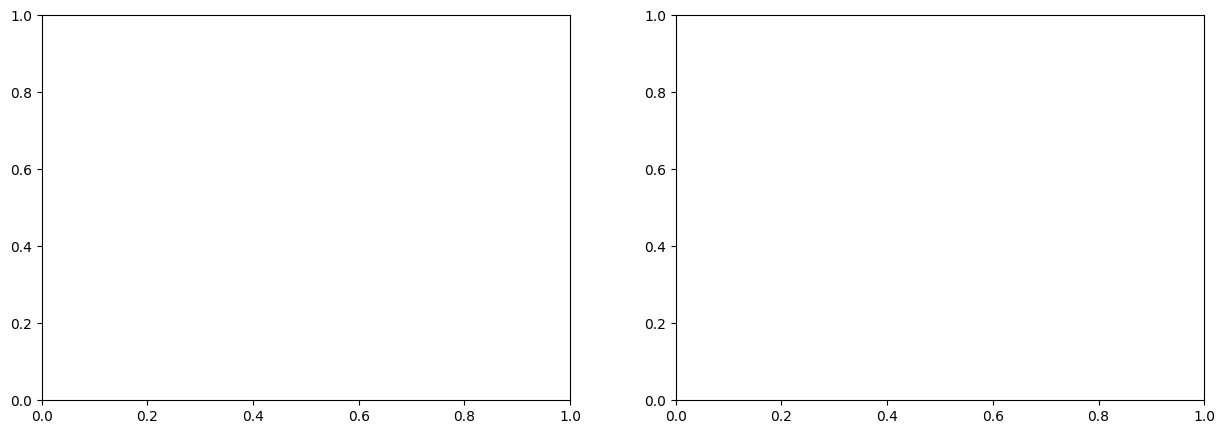

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a summary dashboard of data quality metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Age distribution
sns.boxplot(y=df['age'], ax=ax1)
ax1.set_title('Age Distribution')
ax1.set_ylabel('Age')

# Plot 2: Income distribution (excluding None values)
income_data = df['income'].dropna()
sns.boxplot(y=income_data, ax=ax2)
ax2.set_title('Income Distribution')
ax2.set_ylabel('Income ($)')

plt.tight_layout()

# Display key validation metrics
quality_metrics = {
    'Data Completeness': (len(df) - df['income'].isnull().sum()) / len(df) * 100,
    'Age Validation Pass': validation_results.success,
    'Income Validation Pass': custom_validation['success']
}

print("\nData Quality Metrics Summary:")
for metric, value in quality_metrics.items():
    if isinstance(value, bool):
        print(f"{metric}: {'✓' if value else '✗'}")
    else:
        print(f"{metric}: {value:.1f}%")

### Task 2: Implement a Basic Alert System for Data Quality Drops
**Description**: Set up a basic alert system that triggers when data quality drops.

In [ ]:
# Write your code from here

In [ ]:
def check_data_quality(df, threshold_completeness=95, min_income=30000):
    # Calculate metrics
    completeness = (len(df) - df['income'].isnull().sum()) / len(df) * 100
    income_validation = df.custom.expect_income_above_minimum()
    
    # Define alert conditions
    alerts = []
    if completeness < threshold_completeness:
        alerts.append(f"WARNING: Data completeness ({completeness:.1f}%) below threshold ({threshold_completeness}%)")
    
    if not income_validation['success']:
        alerts.append(f"WARNING: Income validation failed - found values below ${min_income:,}")
    
    if df['age'].min() < 18 or df['age'].max() > 100:
        alerts.append("WARNING: Age values outside valid range (18-100)")
    
    # Print alerts or success message
    if alerts:
        print("🚨 QUALITY ALERTS DETECTED:")
        for alert in alerts:
            print(f"- {alert}")
    else:
        print("✅ All quality checks passed")
        
    return len(alerts) == 0

# Run quality check
quality_status = check_data_quality(df)

### Task 3: Real-time Data Quality Monitoring with Python and Great Expectations
**Description**: Implement a system that monitors data quality in real-time.

In [ ]:
# Write your code from here

In [8]:
import time
from datetime import datetime

class RealTimeQualityMonitor:
    def __init__(self, df, check_interval=5):
        self.df = df
        self.check_interval = check_interval
        self.quality_history = []
        
    def monitor_quality(self, num_iterations=5):
        print("Starting real-time quality monitoring...")
        
        for i in range(num_iterations):
            # Timestamp for this check
            timestamp = datetime.now()
            
            # Run quality checks
            validation_results = self.df.validate(
                expectation_suite={
                    "expectations": [
                        {
                            "expectation_type": "expect_column_values_to_not_be_null",
                            "kwargs": {"column": "income"}
                        },
                        {
                            "expectation_type": "expect_column_values_to_be_between",
                            "kwargs": {
                                "column": "age",
                                "min_value": 18,
                                "max_value": 100
                            }
                        }
                    ]
                }
            )
            
            custom_check = self.df.custom.expect_income_above_minimum()
            
            # Store results
            check_result = {
                'timestamp': timestamp,
                'completeness': (len(self.df) - self.df['income'].isnull().sum()) / len(self.df) * 100,
                'income_validation': custom_check['success'],
                'age_validation': validation_results.success
            }
            self.quality_history.append(check_result)
            
            # Update visualization
            self._update_monitoring_dashboard(check_result)
            
            # Wait for next check
            time.sleep(self.check_interval)
    
    def _update_monitoring_dashboard(self, latest_result):
        # Clear previous plots
        ax1.clear()
        ax2.clear()
        
        # Update plots with latest data
        sns.boxplot(y=self.df['age'], ax=ax1)
        ax1.set_title(f'Age Distribution\nLast check: {latest_result["timestamp"].strftime("%H:%M:%S")}')
        ax1.set_ylabel('Age')
        
        income_data = self.df['income'].dropna()
        sns.boxplot(y=income_data, ax=ax2)
        ax2.set_title('Income Distribution')
        ax2.set_ylabel('Income ($)')
        
        plt.tight_layout()
        
        # Print latest metrics
        print(f"\nQuality Check at {latest_result['timestamp'].strftime('%H:%M:%S')}:")
        print(f"Data Completeness: {latest_result['completeness']:.1f}%")
        print(f"Income Validation: {'✓' if latest_result['income_validation'] else '✗'}")
        print(f"Age Validation: {'✓' if latest_result['age_validation'] else '✗'}")
        print("-" * 50)

# Initialize and start the monitor
monitor = RealTimeQualityMonitor(df)
monitor.monitor_quality()

NameError: name 'df' is not defined

In [11]:
import time
from datetime import datetime

class RealTimeQualityMonitor:
    def __init__(self, df, check_interval=5):
        self.df = df
        self.check_interval = check_interval
        self.quality_history = []
        
        # Create the figure and axes for plotting
        self.fig, (self.ax1, self.ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
    def monitor_quality(self, num_iterations=5):
        print("Starting real-time quality monitoring...")
        
        for i in range(num_iterations):
            # Timestamp for this check
            timestamp = datetime.now()
            
            # Run quality checks
            validation_results = self.df.validate(
                expectation_suite={
                    "expectations": [
                        {
                            "expectation_type": "expect_column_values_to_not_be_null",
                            "kwargs": {"column": "income"}
                        },
                        {
                            "expectation_type": "expect_column_values_to_be_between",
                            "kwargs": {
                                "column": "age",
                                "min_value": 18,
                                "max_value": 100
                            }
                        }
                    ]
                }
            )
            
            custom_check = self.df.custom.expect_income_above_minimum()
            
            # Store results
            check_result = {
                'timestamp': timestamp,
                'completeness': (len(self.df) - self.df['income'].isnull().sum()) / len(self.df) * 100,
                'income_validation': custom_check['success'],
                'age_validation': validation_results.success
            }
            self.quality_history.append(check_result)
            
            # Update visualization
            self._update_monitoring_dashboard(check_result)
            
            # Wait for next check
            time.sleep(self.check_interval)
    
    def _update_monitoring_dashboard(self, latest_result):
        # Clear previous plots
        self.ax1.clear()
        self.ax2.clear()
        
        # Update plots with latest data
        sns.boxplot(y=self.df['age'], ax=self.ax1)
        self.ax1.set_title(f'Age Distribution\nLast check: {latest_result["timestamp"].strftime("%H:%M:%S")}')
        self.ax1.set_ylabel('Age')
        
        income_data = self.df['income'].dropna()
        sns.boxplot(y=income_data, ax=self.ax2)
        self.ax2.set_title('Income Distribution')
        self.ax2.set_ylabel('Income ($)')
        
        plt.tight_layout()
        
        # Print latest metrics
        print(f"\nQuality Check at {latest_result['timestamp'].strftime('%H:%M:%S')}:")
        print(f"Data Completeness: {latest_result['completeness']:.1f}%")
        print(f"Income Validation: {'✓' if latest_result['income_validation'] else '✗'}")
        print(f"Age Validation: {'✓' if latest_result['age_validation'] else '✗'}")
        print("-" * 50)
        
        # Force the plot to update
        self.fig.canvas.draw()
        plt.pause(0.1)

# Initialize and start the monitor
monitor = RealTimeQualityMonitor()
monitor.monitor_quality()

TypeError: RealTimeQualityMonitor.__init__() missing 1 required positional argument: 'df'